# Project 5: Topic Modeling using NMF | Extracting topics from AWS Documentation
- Used Non-Negative Matrix Factorization to model topics from AWS document extracts
- Performed Natural Language Processing preprocessing tasks 

In [79]:
#We load the corpus dataset
import pandas as pd
import seaborn as sns
df = pd.read_csv('AWS Documents.csv', sep='\t')
df.head()

,Document
0,amazon ec2 provides the following networking f...
1,amazon elastic compute cloud (amazon ec2) conf...
2,amazon ec2 provides amazon cloudwatch metrics ...
3,the following procedures are for creating an i...
4,an ec2 fleet is a group of on-demand instances...


In [80]:
#Take a look at how many records exists
len(df)

1205

In [81]:
#We'll use Sklearns implementation of the NMF algorith
from sklearn.decomposition import NMF

#Imported TFIDF vectorizer for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

#As wel las NTLK's stop words
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

#Creating an instance of the vectorizer (words need to be present in 2 or more docs to be considered)
vectorizer = TfidfVectorizer(min_df=2, stop_words=stops)

#Training data is transformed
X_transform = vectorizer.fit_transform(df['Document'])

#NMF model is instanciated and fit to training data
model = NMF(n_components=3)
results = model.fit_transform(X_transform)

In [82]:
len(results.argmax(axis=1))

1205

In [83]:
#Assigning a topic ID to original dataframe
df['Topic'] = results.argmax(axis=1)

In [84]:
df.head()

,Document,Topic
0,amazon ec2 provides the following networking f...,1
1,amazon elastic compute cloud (amazon ec2) conf...,1
2,amazon ec2 provides amazon cloudwatch metrics ...,1
3,the following procedures are for creating an i...,1
4,an ec2 fleet is a group of on-demand instances...,1


c:\Users\Ivan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Topic', ylabel='count'>

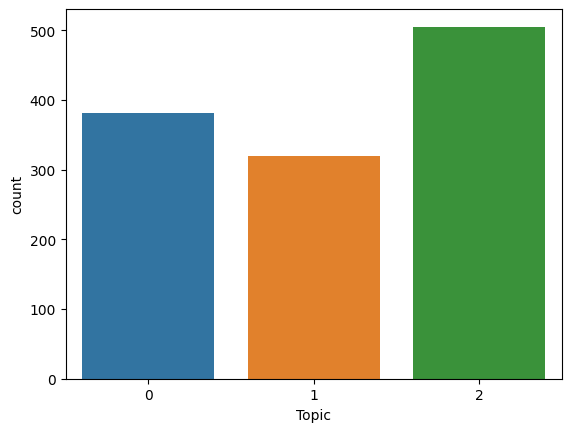

In [85]:
#Count how many instances of each topic there are
sns.countplot(df['Topic'])

In [86]:
#Taking a look at words present in each topic in order to better define them
for value,topic in enumerate(model.components_):
    print(f"Topic {value}")
    print('=========================')
    words = []
    for index in topic.argsort()[-20:]:
        try:
            words.append(vectorizer.get_feature_names_out()[index])
        except:
            pass
    print(words)

Topic 0
['policy', 'see', 'want', 'delete', 'guide', 'service', 'simple', 'developer', 'public', 'name', 'console', 'storage', 'aws', 'objects', 'amazon', 'choose', 'access', 'object', 's3', 'bucket']
Topic 1
['notebook', 'aws', 'device', 'following', 'see', 'use', 'choose', 'information', 'spot', 'linux', 'amazon', 'command', 'volumes', 'ebs', 'launch', 'ec2', 'ami', 'instances', 'volume', 'instance']
Topic 2
['input', 'task', 'following', 'hyperparameters', 'endpoint', 'image', 'inference', 'create', 'tuning', 'container', 'labeling', 'use', 'data', 'notebook', 'algorithm', 'job', 'amazon', 'training', 'model', 'sagemaker']


In [87]:
#Mapping topic numbers to meaningful IDs according to the words displayed above
topics = {
    0:'Compute', #All texts assigned to ID 0 will be considered "Compute topics"
    1:"EC2_Instances", #All texts assigned to ID 1 will be considered "EC2 instance topics"
    2:"Machine_Learning" #All texts assigned to ID 02will be considered "Machine learning topics"
}
df['Topic'] = df['Topic'].map(topics)
df.head()

,Document,Topic
0,amazon ec2 provides the following networking f...,EC2_Instances
1,amazon elastic compute cloud (amazon ec2) conf...,EC2_Instances
2,amazon ec2 provides amazon cloudwatch metrics ...,EC2_Instances
3,the following procedures are for creating an i...,EC2_Instances
4,an ec2 fleet is a group of on-demand instances...,EC2_Instances


c:\Users\Ivan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Topic', ylabel='count'>

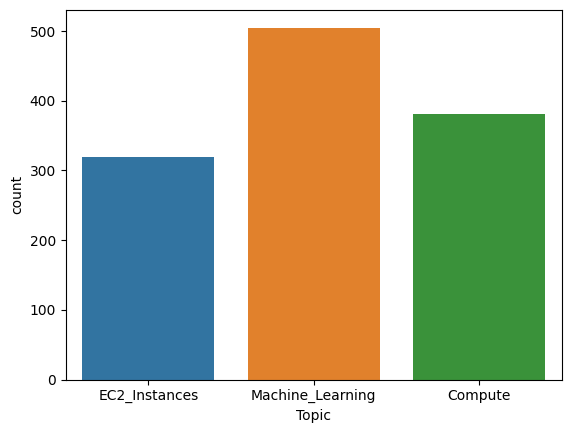

In [98]:
#Gettingt he same graph from 2 cells above
sns.countplot(df['Topic'])

In [90]:
#Inspecting text assigned to machine learning topics to assess if it truly speaks about that
df[df['Topic']=='Machine_Learning'].iloc[13]['Document']

'hyperparameter tuning finds the best hyperparameter values for your model by searching over ranges of hyperparameters. you specify the hyperparameters and range of values over which to search by defining hyperparameter ranges for your tuning job. choosing hyperparameters and ranges significantly affects the performance of your tuning job. for guidance on choosing hyperparameters and ranges, see . to define hyperparameter ranges by using the low-level api, you specify the names of hyperparameters and ranges of values in the  field of the  parameter that you pass to the  operation. the  field has three subfields, one for each of the categorical, integer, and continuous hyperparameter ranges. you can define up to 20 hyperparameters to search over. each value of a categorical hyperparameter range counts as a hyperparameter against the limit. hyperparameter ranges have the following structure: for integer and continuous hyperparameter ranges, you can choose the scale you want hyperparamete

In [94]:
#Inspecting text assigned to ec2 instances topics to assess if it truly speaks about that
df[df['Topic']=='EC2_Instances'].iloc[13]['Document']

"an ec2 fleet contains the configuration information to launch a fleet—or group—of instances. in a single api call, a fleet can launch multiple instance types across multiple availability zones, using the on-demand instance, reserved instance, and spot instance purchasing options together. using ec2 fleet, you can: define separate on-demand and spot capacity targets and the maximum amount you’re willing to pay per hourspecify the instance types that work best for your applicationsspecify how amazon ec2 should distribute your fleet capacity within each purchasing optionyou can also set a maximum amount per hour that you’re willing to pay for your fleet, and ec2 fleet launches instances until it reaches the maximum amount. when the maximum amount you're willing to pay is reached, the fleet stops launching instances even if it hasn’t met the target capacity. the ec2 fleet attempts to launch the number of instances that are required to meet the target capacity specified in your request. if

In [91]:
#Inspecting text assigned to compute topics to assess if it truly speaks about that
df[df['Topic']=='Compute'].iloc[13]['Document']

'amazon s3 provides a set of tools to help you manage your s3 batch operations jobs after you create them. for more information about managing s3 batch operations, see  in the amazon simple storage service developer guide.    in the amazon simple storage service developer guide in the amazon simple storage service developer guide in the amazon simple storage service developer guide'